In [1]:
import numpy as np
import matplotlib.pyplot as plt

This assignments has two sections:
* Linear Regression
* Kernel Regression




# Section 1:

**Linear Regression**

We will use the Boston_housing dataset for the regression problem. Run the below cell to get the following variables:
* `Training_data` = Training data matrix of shape $(n, d)$
* `labels` = label vector corresponding to the training data
* `test_data` = Test data matrix of shape $(n_1, d)$ where $n_1$ is the number of examples in test dataset.
* `test_labels` = label vector corresponding to the test data

Use this dataset for the regression problem.

In [2]:
from keras.datasets import boston_housing
Train, test = boston_housing.load_data(seed= 111)
Training_data, labels = Train[0], Train[1]
Test_data, test_labels = test[0], test[1]

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 2us/step


## Question 1
How many examples are there in the training dataset?

In [3]:
Training_data.shape[0]

404

## Question 2
How many examples are there in the test dataset?

In [4]:
Test_data.shape[0]

102

## Question 3

How many features are there in the dataset?

In [5]:
Training_data.shape[1]

13

Linear regression model for the dataset ${\mathbb{x}, y}$ is given as
$$h_w(\mathbb{x}) = w_1x^{1}+w_2x^{2}+...+w_dx^{d} =  \mathbb{x}^Tw
$$

where $x^{i}$ is the $i^{th}$ feature, $\mathbb{x}$ is the feature matrix of shape $(d, n)$ and $w = [w_1, w_2, ...w_d]^T$ is the weight vector.


Notice that above model always pass through the origin but for a given dataset, best fit model need not pass through the origin. To tackle this issue, we add an intercept $w_0$ in the model and set the corresponding featrue $x^{0}$ to $1$. That is 

$$h_w(\mathbb{x}) =w_0x^{0}+ w_1x^{1}+w_2x^{2}+...+w_dx^{n} =  \mathbb{x}^Tw
$$

We call $x^{0}$ the dummy feature and set its value to 1 for each examples. Now $w$ is of shape $(d+1, 1)$ and $\mathbb{x}$ is of shape $(d+1, n)$ where the first row of $\mathbb{x}$ has entries as 1.


## Task 

Add the dummy feature in the feature matrix `Training_data` and test data matrix `test_data`. We will be using this new feature matrices (after adding te dummy feature) for learning the model.

In [34]:
dummy_feature = np.ones(Training_data.shape[0])
X = np.column_stack((dummy_feature, Training_data))
X_test = np.column_stack((np.ones(Test_data.shape[0]), Test_data))
print(X.shape,X_test.shape)

(404, 14) (102, 14)


## Question 4
If the solution of optimization problem is obtained by setting the first derivative of loss function (squared loss) to zero, find the value of $w_0,w_1,...w_d$.

since i am using shape[0] as the number of elements and shape[1] as the number of features , the formula becomes (X.T @ X)Partial inverse @ X.T @ Y 

In [43]:
def weights(X, y): 
  return (np.linalg.pinv((X.T)@(X)))@(X.T)@y

In [50]:
W = weights(X, labels)
W.shape

(14,)

These are the coeefecients of x1,x2,x3,...,xn,1

## Question 5
Find the average of the predictions made by the above model.



In [ ]:
def predict(X, w):
  return (X)@w

In [ ]:
np.mean(predict(X, W)) #no point i think , since we are not giving the mean of a feature 

22.30915841584045

## Question 6

Find the loss for the training data points using the above model. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point. 

This is the loss with regards to the training data only, not the test data.

In [ ]:
def loss(X, W):
    ans = 0
    import math
    for i in range(len(X)):
        ans += ((X[i]-W[i])**2)
    ans /= len(X)
    return math.sqrt(ans)

def loss1(X,W,labels):
    ans = 0
    for i in range(len(X)):
        ans += (X[i]@W - labels[i])**2
    ans /= len(X)
    return np.sqrt(ans)

In [62]:
y_hat = predict(X, W)
print(loss(labels, y_hat),loss1(X,W,labels))

4.552387969840812 4.552387969840813


## Question 7

Find the loss for the test data points using the above model. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point. 

In [63]:
y_test_hat = predict(X_test, W)
print(loss(test_labels, y_test_hat),loss1(X_test,W,test_labels))

5.327662216187744 5.327662216187743


## Question 8
Find the weights using the gradient descent. Use a constant learning rate of $\eta = 10^{-10}$. Initialize the weight vector as zero vector and update the weights for 100 iterations.



In [70]:
def gradient(X, w, y):
  return 2*((X.T)@X)@w-2*((X.T)@y)

In [65]:
def GradDesc(X, w0, y, eta):
  for i in range(100):
    w0 = w0- eta*(gradient(X, w0, y))
  return w0

In [77]:
upw = GradDesc(X, np.zeros(X.shape[1]), labels, 1e-10)
print(upw)

[ 7.40008965e-05 -5.09455988e-05  1.62737973e-03  4.95579098e-04
  7.52578727e-06  3.62130099e-05  5.04129247e-04  4.03267490e-03
  3.41356839e-04  3.32757188e-04  2.15186218e-02  1.26868172e-03
  2.82816603e-02  4.89426249e-04]


## Question 9

Find the loss for the training data points if the model is learnt using the gradient descent as in question 8. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point. 

Use the training data.

In [78]:
gd_y_hat = predict(X, upw)
loss(labels, gd_y_hat)

11.13727323702196

## Question 10

Find the loss for the test data points if the model is learnt using the gradient descent as in question 8. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point. 

Use the test data.

In [79]:
gd_y_test_hat = predict(X_test, upw)
loss(test_labels, gd_y_test_hat)

10.96449125006215

## Question 11
Find the weights using the stochastic gradient descent. Use a constant learning rate of $\eta = 10^{-8}$. Initialize the weight vector as zero vector and update the weights for 1000 iterations. Take the batch size of $⌈\text{number of samples}/5⌉ $. For sampling the batch examples in $ith$ iteration, set seed at $i$. The final weight is the last updated weight.



In [ ]:
def SGD(X, w0, y, eta):
  ans = []
  for i in range(1000):
    rng = np.random.default_rng(seed = i)
    indices = rng.integers(0, X.shape[0], size = X.shape[0]//5) # randomly choose 5 data points
    X1 = X[indices]
    y1 = y[indices]
    w0 = w0- eta*(gradient(X1, w0, y1))
    ans.append(w0)
  return np.array(ans)

In [ ]:
supw = SGD(X, np.zeros(X.shape[1]), labels, 1e-8)
supw = np.sum(supw,axis=0)
print(supw)
supw /= 1000
print(supw) # this is the final value that we get , for W after all the iterations.

[  0.64066455  -8.73671591  39.91421138  -5.088115     0.30613938
   0.18681645   7.2239351    4.84239534   3.13826328  -1.86301684
   0.69234395   5.96249139  58.00893994 -18.94435947]
[ 0.00064066 -0.00873672  0.03991421 -0.00508812  0.00030614  0.00018682
  0.00722394  0.0048424   0.00313826 -0.00186302  0.00069234  0.00596249
  0.05800894 -0.01894436]


## Question 12

Find the loss for the training data points if the model is learnt using the stochastic gradient descent as in question 11. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point. 

In [103]:
sgd_y_hat = predict(X, supw)
loss(labels, sgd_y_hat)

8.805783230123094

In this case , it would seem that directly using the last found data, rather than average gives us a better result, but it is still better to use the average since if we have the last data point in same bad direction, it would give us a very inaccurate answer.

## Question 13

Find the loss for the test data points if the model is learnt using the stochastic gradient descent as in question 11. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point. 

In [104]:
sgd_y_test_hat = predict(X_test, supw)
loss(test_labels, sgd_y_test_hat)

8.535665480156311

# Section 2:

**kernel Regression**

We will generate the synthetic dataset for the kernel regression problem. Run the following cell to get the following variables:

`X` = Training data matrix of shape $(n, d)$. In the given dataset $d = 1$. 

`y` = label vector corresponding to the training dataset

In [ ]:
rng = np.random.default_rng(seed = 101)
X = np.arange(-2, 2, 0.01).reshape(-1, 1) # from -2 to 2 , with a step of 0.01 , it is like linspace
y = X**3 + rng.normal(0, 1, X.shape[0]).reshape(-1, 1) # this is the modification in the data.


## Question 14

Plot the scatter plot between feature and the labels. Enter your answer as 0.

**Answer**

0

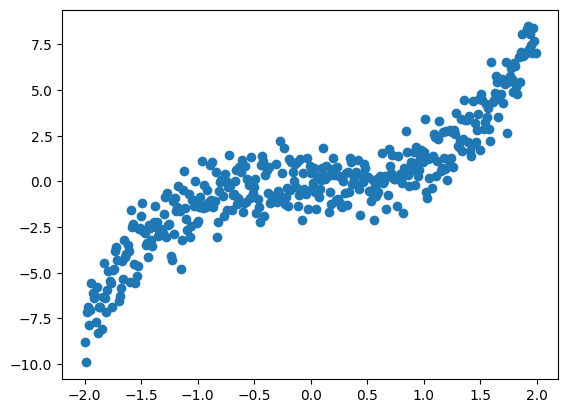

In [106]:
plt.scatter(X,y)

## Question 15
How many examples are there in the training dataset?

In [107]:
X.shape

(400, 1)

## Task:

Add the dummy feature in the feature matrix `X`and reshape it to the shape $(d, n)$.

In [ ]:
X_train = np.column_stack((np.ones(X.shape[0]), X.reshape(-1, 1))).T # dummy feature is important
labels = y.reshape(-1, 1)

## Question 16

Our task is to apply the kernel regression with polynomial kernel of degree 3. We know that weight vector can be written as

$$w = \phi(\mathbb{x})\alpha$$

the formula is alpha = K inverse * y , where K is any type of kernel

In [109]:
def PolyKernel(X, p):
  return (X.T@X+1)**p

In [ ]:
def coef(X_train, y,  p):
  K = PolyKernel(X_train, p)
  return (np.linalg.pinv(K))@y

In [ ]:
coeff = coef(X_train, labels, 3)
print(coeff.shape) 
print(coeff) # this is equal to alpha = K inverse * y

(400, 1)
[[-5.24851232e-03]
 [-5.08968829e-03]
 [-4.93287804e-03]
 [-4.77807135e-03]
 [-4.62525801e-03]
 [-4.47442782e-03]
 [-4.32557056e-03]
 [-4.17867602e-03]
 [-4.03373401e-03]
 [-3.89073431e-03]
 [-3.74966670e-03]
 [-3.61052099e-03]
 [-3.47328696e-03]
 [-3.33795440e-03]
 [-3.20451311e-03]
 [-3.07295287e-03]
 [-2.94326348e-03]
 [-2.81543473e-03]
 [-2.68945641e-03]
 [-2.56531831e-03]
 [-2.44301022e-03]
 [-2.32252194e-03]
 [-2.20384325e-03]
 [-2.08696394e-03]
 [-1.97187382e-03]
 [-1.85856266e-03]
 [-1.74702025e-03]
 [-1.63723640e-03]
 [-1.52920089e-03]
 [-1.42290351e-03]
 [-1.31833406e-03]
 [-1.21548232e-03]
 [-1.11433809e-03]
 [-1.01489115e-03]
 [-9.17131302e-04]
 [-8.21048333e-04]
 [-7.26632035e-04]
 [-6.33872199e-04]
 [-5.42758616e-04]
 [-4.53281077e-04]
 [-3.65429373e-04]
 [-2.79193295e-04]
 [-1.94562636e-04]
 [-1.11527185e-04]
 [-3.00767337e-05]
 [ 4.97989261e-05]
 [ 1.28110004e-04]
 [ 2.04866708e-04]
 [ 2.80079247e-04]
 [ 3.53757831e-04]
 [ 4.25912667e-04]
 [ 4.96553966e-04]
 [ 

## Question 17

Find the sum of the predictions made by the kernel regression model of degree 3.


In [116]:
def kernel_predict(X, y, p):
  coeff = coef(X, y, p)
  K = PolyKernel(X, p)
  return K@coeff # we find K @ alpha , which is equivalent to weight.

In [117]:
yp = kernel_predict(X.T, labels, 3)
print(yp)

[[-7.90905857e+00]
 [-7.79223619e+00]
 [-7.67659391e+00]
 [-7.56212573e+00]
 [-7.44882563e+00]
 [-7.33668763e+00]
 [-7.22570571e+00]
 [-7.11587386e+00]
 [-7.00718609e+00]
 [-6.89963640e+00]
 [-6.79321876e+00]
 [-6.68792719e+00]
 [-6.58375568e+00]
 [-6.48069822e+00]
 [-6.37874881e+00]
 [-6.27790144e+00]
 [-6.17815011e+00]
 [-6.07948882e+00]
 [-5.98191156e+00]
 [-5.88541233e+00]
 [-5.78998512e+00]
 [-5.69562392e+00]
 [-5.60232274e+00]
 [-5.51007557e+00]
 [-5.41887641e+00]
 [-5.32871925e+00]
 [-5.23959808e+00]
 [-5.15150690e+00]
 [-5.06443972e+00]
 [-4.97839051e+00]
 [-4.89335329e+00]
 [-4.80932204e+00]
 [-4.72629076e+00]
 [-4.64425344e+00]
 [-4.56320409e+00]
 [-4.48313670e+00]
 [-4.40404526e+00]
 [-4.32592376e+00]
 [-4.24876622e+00]
 [-4.17256661e+00]
 [-4.09731894e+00]
 [-4.02301720e+00]
 [-3.94965538e+00]
 [-3.87722749e+00]
 [-3.80572752e+00]
 [-3.73514946e+00]
 [-3.66548731e+00]
 [-3.59673507e+00]
 [-3.52888672e+00]
 [-3.46193628e+00]
 [-3.39587772e+00]
 [-3.33070506e+00]
 [-3.2664122

## Question 18

Find the loss for the training data points. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point. 

In [118]:
print(loss(y, yp))

1.0061212525621972


C:\Users\Om\AppData\Local\Temp\ipykernel_6888\3883326603.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.sqrt(ans)


### Test dataset

run the following cell to get the test data matrix `X_test` and corresponding label vector `y_test`.

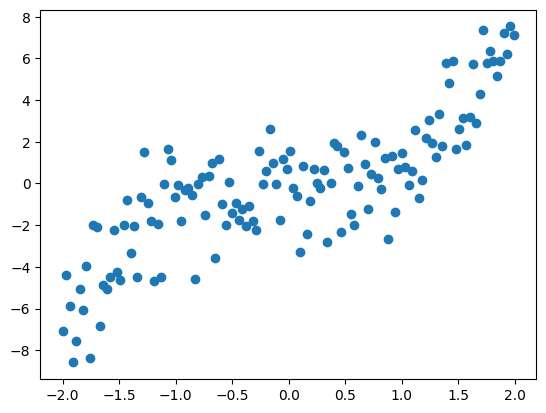

In [119]:
rng = np.random.default_rng(seed = 102)
Xnew = np.arange(-2, 2, 0.03)
ynew = Xnew**3 + rng.normal(0, 1.5, Xnew.shape[0])
X_test = np.column_stack((np.ones(Xnew.shape[0]), Xnew.reshape(-1, 1))).T
y_test = ynew.reshape(-1, 1)
plt.scatter(Xnew,ynew)

This is the test dataset, just to check the correctness of our output ;-;.

## Question 19

Find the loss for the test data points. Consider the loss to be defined as

$$ \sqrt{\dfrac{1}{n}\sum\limits_{i=1}^{n} (y_i- \hat{y}_i)^2}
$$

Where $\hat{y}_i$ is the prediction for $i^{th}$ data point. 

when using it with test set, only the kernel matrix changes.

In [122]:
def K_matrix(X, X_test, p):
  return (X.T@X_test+1)**p

In [123]:
Kmatrix = K_matrix(X_train, X_test, 3)

In [124]:
prediction = Kmatrix.T@coeff

In [125]:
loss(y_test, prediction)

C:\Users\Om\AppData\Local\Temp\ipykernel_6888\3883326603.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  return math.sqrt(ans)


1.565099676317016